In [1]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# see module 15

In [6]:
clean_data_df=pd.read_csv("2011-22_clean_NCAA_stats.csv")

In [7]:
df.head()

NameError: name 'df' is not defined

In [8]:
clean_data_df.tail()

,Team,Assists Per. Game Rank,Assist Turnover Ratio Rank,BlocksPerGame Rank,Field Goal % Rank,Field Goal % Defense Rank,Fouls Per Game Rank,Free Throw % Rank,Rebound Margin Rank,Scoring Defense Rank,...,Scoring Offense Rank,Steals Per Game Rank,Three Pt FG Defense Rank,Three Pt FG % Rank,Three Pt FG Per Game Rank,Turnover Margin Rank,Turnover Per Game Rank,Win-Loss Rank,Tournament Wins,Conference
3788,Wright St.,233,196,322,138,113,223,145,226,19,...,294,92,54,0,225,248.0,151,82,0,Horizon
3789,Wyoming,252,127,195,203,178,26,233,315,24,...,304,221,88,0,123,224.0,37,113,0,Mountain West
3790,Xavier,286,238,245,58,67,160,259,39,65,...,228,298,86,0,316,82.0,149,146,0,Atlantic 10
3791,Yale,152,208,225,186,253,244,61,59,163,...,181,211,330,0,187,0.0,239,208,0,Ivy League
3792,Youngstown St.,40,30,16,184,158,116,180,248,242,...,77,158,229,0,70,0.0,52,162,0,Horizon


In [9]:
# Set independent and dependent variables.
ast_per_game = clean_data_df['Assists Per. Game Rank']
ast_to_ratio = clean_data_df['Assist Turnover Ratio Rank']
blocks_per_game = clean_data_df['BlocksPerGame Rank']
fieldgoalprc = clean_data_df['Field Goal % Rank']
fieldgoalprcdef = clean_data_df['Field Goal % Defense Rank']
fouls_per_game = clean_data_df['Fouls Per Game Rank']
ftprc = clean_data_df['Free Throw % Rank']
reb_marg = clean_data_df['Rebound Margin Rank']
scoring_def = clean_data_df['Scoring Defense Rank']
scoring_margin = clean_data_df['Scoring Margin Rank']
scoring_off = clean_data_df['Scoring Offense Rank']
stls_per_game = clean_data_df['Steals Per Game Rank']
threept_fg_def = clean_data_df['Three Pt FG Defense Rank']
threept_fg_prc = clean_data_df['Three Pt FG % Rank']
threept_fg_per_game = clean_data_df['Three Pt FG Per Game Rank']
to_margin = clean_data_df['Turnover Margin Rank']
to_per_game = clean_data_df['Turnover Per Game Rank']
wl = clean_data_df['Win-Loss Rank']
tournament_wins = clean_data_df['Tournament Wins']

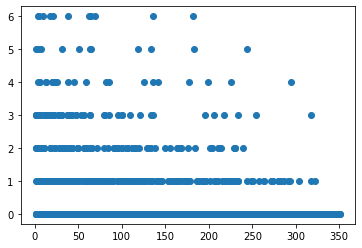

In [10]:
plt.scatter(fieldgoalprc, tournament_wins)


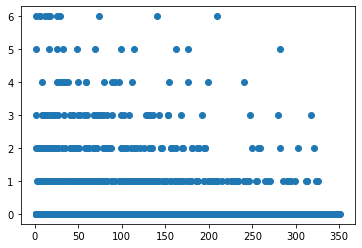

In [11]:
plt.scatter(scoring_off, tournament_wins)

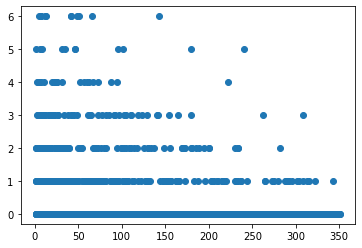

In [12]:
plt.scatter(ast_to_ratio, tournament_wins)

In [13]:
clean_data_df['Three Pt FG % Rank'] = clean_data_df['Three Pt FG % Rank'].fillna(0).astype("int64") 
clean_data_df['Turnover Margin Rank'] = clean_data_df['Turnover Margin Rank'].fillna(0).astype("int64") 


In [40]:
# X2=clean_data_df['Field Goal % Rank'].values.reshape(1,-1)
X=clean_data_df.drop(['Conference','Tournament Wins','Team'],axis=1)
y=clean_data_df['Tournament Wins'].values
# turnament_wins.values.reshape(1, -1)
lm=linear_model.LinearRegression()
model=lm.fit(X,y)


In [18]:
# lm2=linear_model.LinearRegression()
# model2=lm2.fit(X2,y)

In [19]:
y_pred=model.predict(X)
print(y_pred.shape)

(3793,)


In [20]:
print(model.coef_)
print(model.intercept_)



[ 1.19545935e-03 -1.77175511e-03 -6.07878386e-04 -3.66507281e-04
 -3.89716252e-04 -6.73128097e-05 -9.77738588e-05 -7.36957470e-04
 -9.24313426e-04  1.99790549e-03 -1.06999077e-03 -2.94020056e-04
 -3.45015089e-04 -1.99950610e-04  4.03560807e-05 -1.90080056e-04
  1.04309460e-05 -1.34733073e-03]
1.074130822141813


ValueError: x and y must be the same size

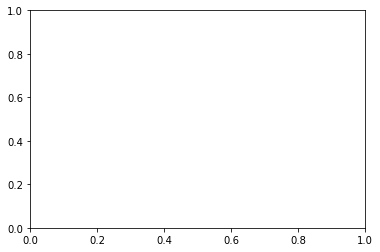

In [21]:
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.show()

NameError: name 'regress_values' is not defined

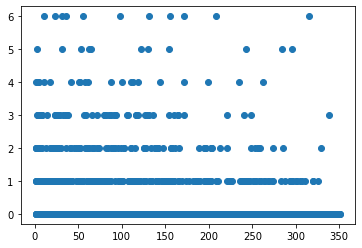

In [22]:
# Create a scatter plot of the x and y values.
plt.scatter(ast_per_game, tournament_wins)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(tournament_wins,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (5,20), fontsize=15, color="red")
plt.xlabel('Assists Per Game Rank')
plt.ylabel('Tournament Wins')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear',random_state=1)
classifier

LogisticRegression(random_state=1, solver='liblinear')

In [25]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
   random_state=1, solver='liblinear', tol=0.0001, warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=1,
                   solver='liblinear')

In [26]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [34]:
predictions = classifier.predict(X_test)
preds=pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8977871443624869

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
classification_report(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [949, 3793]

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
   classifier2 = GradientBoostingClassifier(n_estimators=20,
   learning_rate=learning_rate,
   max_features=5,
   max_depth=3,
   random_state=0)
   classifier2.fit(X_train_scaled, y_train.ravel)

TypeError: Singleton array array(<bound method Series.ravel of 3679    0
1556    0
3708    0
3456    0
671     0
       ..
2153    0
40      0
1943    0
470     0
2757    0
Name: Tournament Wins, Length: 2844, dtype: int64>, dtype=object) cannot be considered a valid collection.

In [51]:
from collections import Counter
Counter(y_test)

Counter({0: 854, 1: 56, 3: 10, 2: 21, 4: 4, 6: 3, 5: 1})

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [53]:
Counter(y_resampled)

Counter({0: 2567, 1: 2567, 2: 2567, 3: 2567, 5: 2567, 6: 2567, 4: 2567})

In [54]:
classifier.fit(X_resampled,y_resampled)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=20,
                           random_state=0)